In [1]:
import pandas as pd
import os
from collections import defaultdict

In [2]:
metadata_df = pd.read_csv("./processed/processed_collection_data.csv")
metadata_df[:5]

,Collection,CollectionSize(B),MRCount,CTCount,PTCount,CRCount,DXCount,NMCount,XACount,USCount,MGCount
0,CPTAC-SAR,15196915718,4621,22450,2524,0,0,0,0,0,0
1,Prostate Fused-MRI-Pathology,4743508634,32508,0,0,0,0,0,0,0,0
2,LungCT-Diagnosis,2469159104,0,4682,0,0,0,0,0,0,0
3,RIDER PHANTOM PET-CT,722874316,0,1291,940,0,0,0,0,0,0
4,ACRIN-DSC-MR-Brain,86886455912,717000,70,0,0,0,0,0,0,0


In [3]:
# OK, now lets get an overview of all the data we have access to. 
size_col = metadata_df["CollectionSize(B)"]
total_tcia_size = sum(size_col)
total_tcia_size_GB = total_tcia_size // 1000 // 1000 // 1000

print(f"Total amount of data we have access to is {total_tcia_size_GB}GB")

Total amount of data we have access to is 6856GB


In [4]:
# Lets see how many of each image type there is.

for column in metadata_df:
    if "Count" in column:
        print(column, sum(metadata_df[column]))


MRCount 5666745
CTCount 16636416
PTCount 1783027
CRCount 235
DXCount 848
NMCount 71
XACount 10
USCount 4949
MGCount 228250


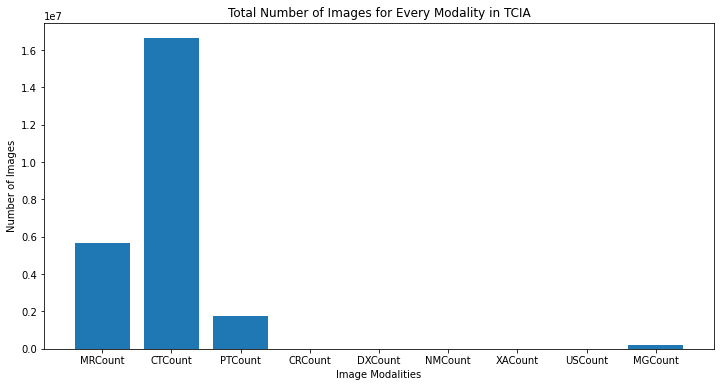

In [5]:
import matplotlib.pyplot as plt

x = [col for col in metadata_df if "Count" in col]
x_pos = [i for i, _ in enumerate(x)]
values = [sum(metadata_df[column]) for column in metadata_df if "Count" in column]

fig, ax = plt.subplots(figsize=(12, 6))

plt.bar(x_pos, values)
plt.xticks(x_pos, x)
plt.xlabel("Image Modalities")
plt.ylabel("Number of Images")
plt.title("Total Number of Images for Every Modality in TCIA")
plt.show()

In [6]:
# fig, ax = plt.subplots(10, 10)
"""
From the above graph we can see there are an irrelevant number of XA's 
and NM's and also NM is too broad a term to be useful.

We could not find enough datasets for US so that also had to be removed.
Final modalities are:
["MR", "CT", "PT", "CR", "DX", "MG"]
"""
modalities = ["MR", "CT", "PT", "CR", "DX", "MG"]


[Text(0, 0, 'MRCount'),
 Text(1, 0, 'CTCount'),
 Text(2, 0, 'PTCount'),
 Text(3, 0, 'CRCount'),
 Text(4, 0, 'DXCount'),
 Text(5, 0, 'NMCount'),
 Text(6, 0, 'XACount'),
 Text(7, 0, 'USCount'),
 Text(8, 0, 'MGCount')]

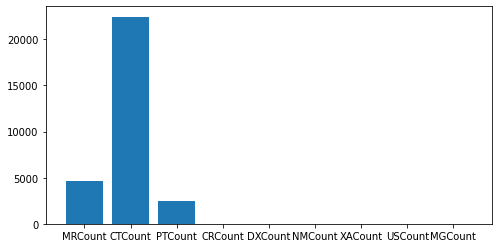

In [7]:

fig, ax = plt.subplots(figsize=(8,4))

x = [col for col in metadata_df if "Count" in col]
x_pos = range(0, len(x))
y = [metadata_df[col][0] for col in x]

ax.bar(x_pos, y)
ax.set_xticks(x_pos)
ax.set_xticklabels(x)

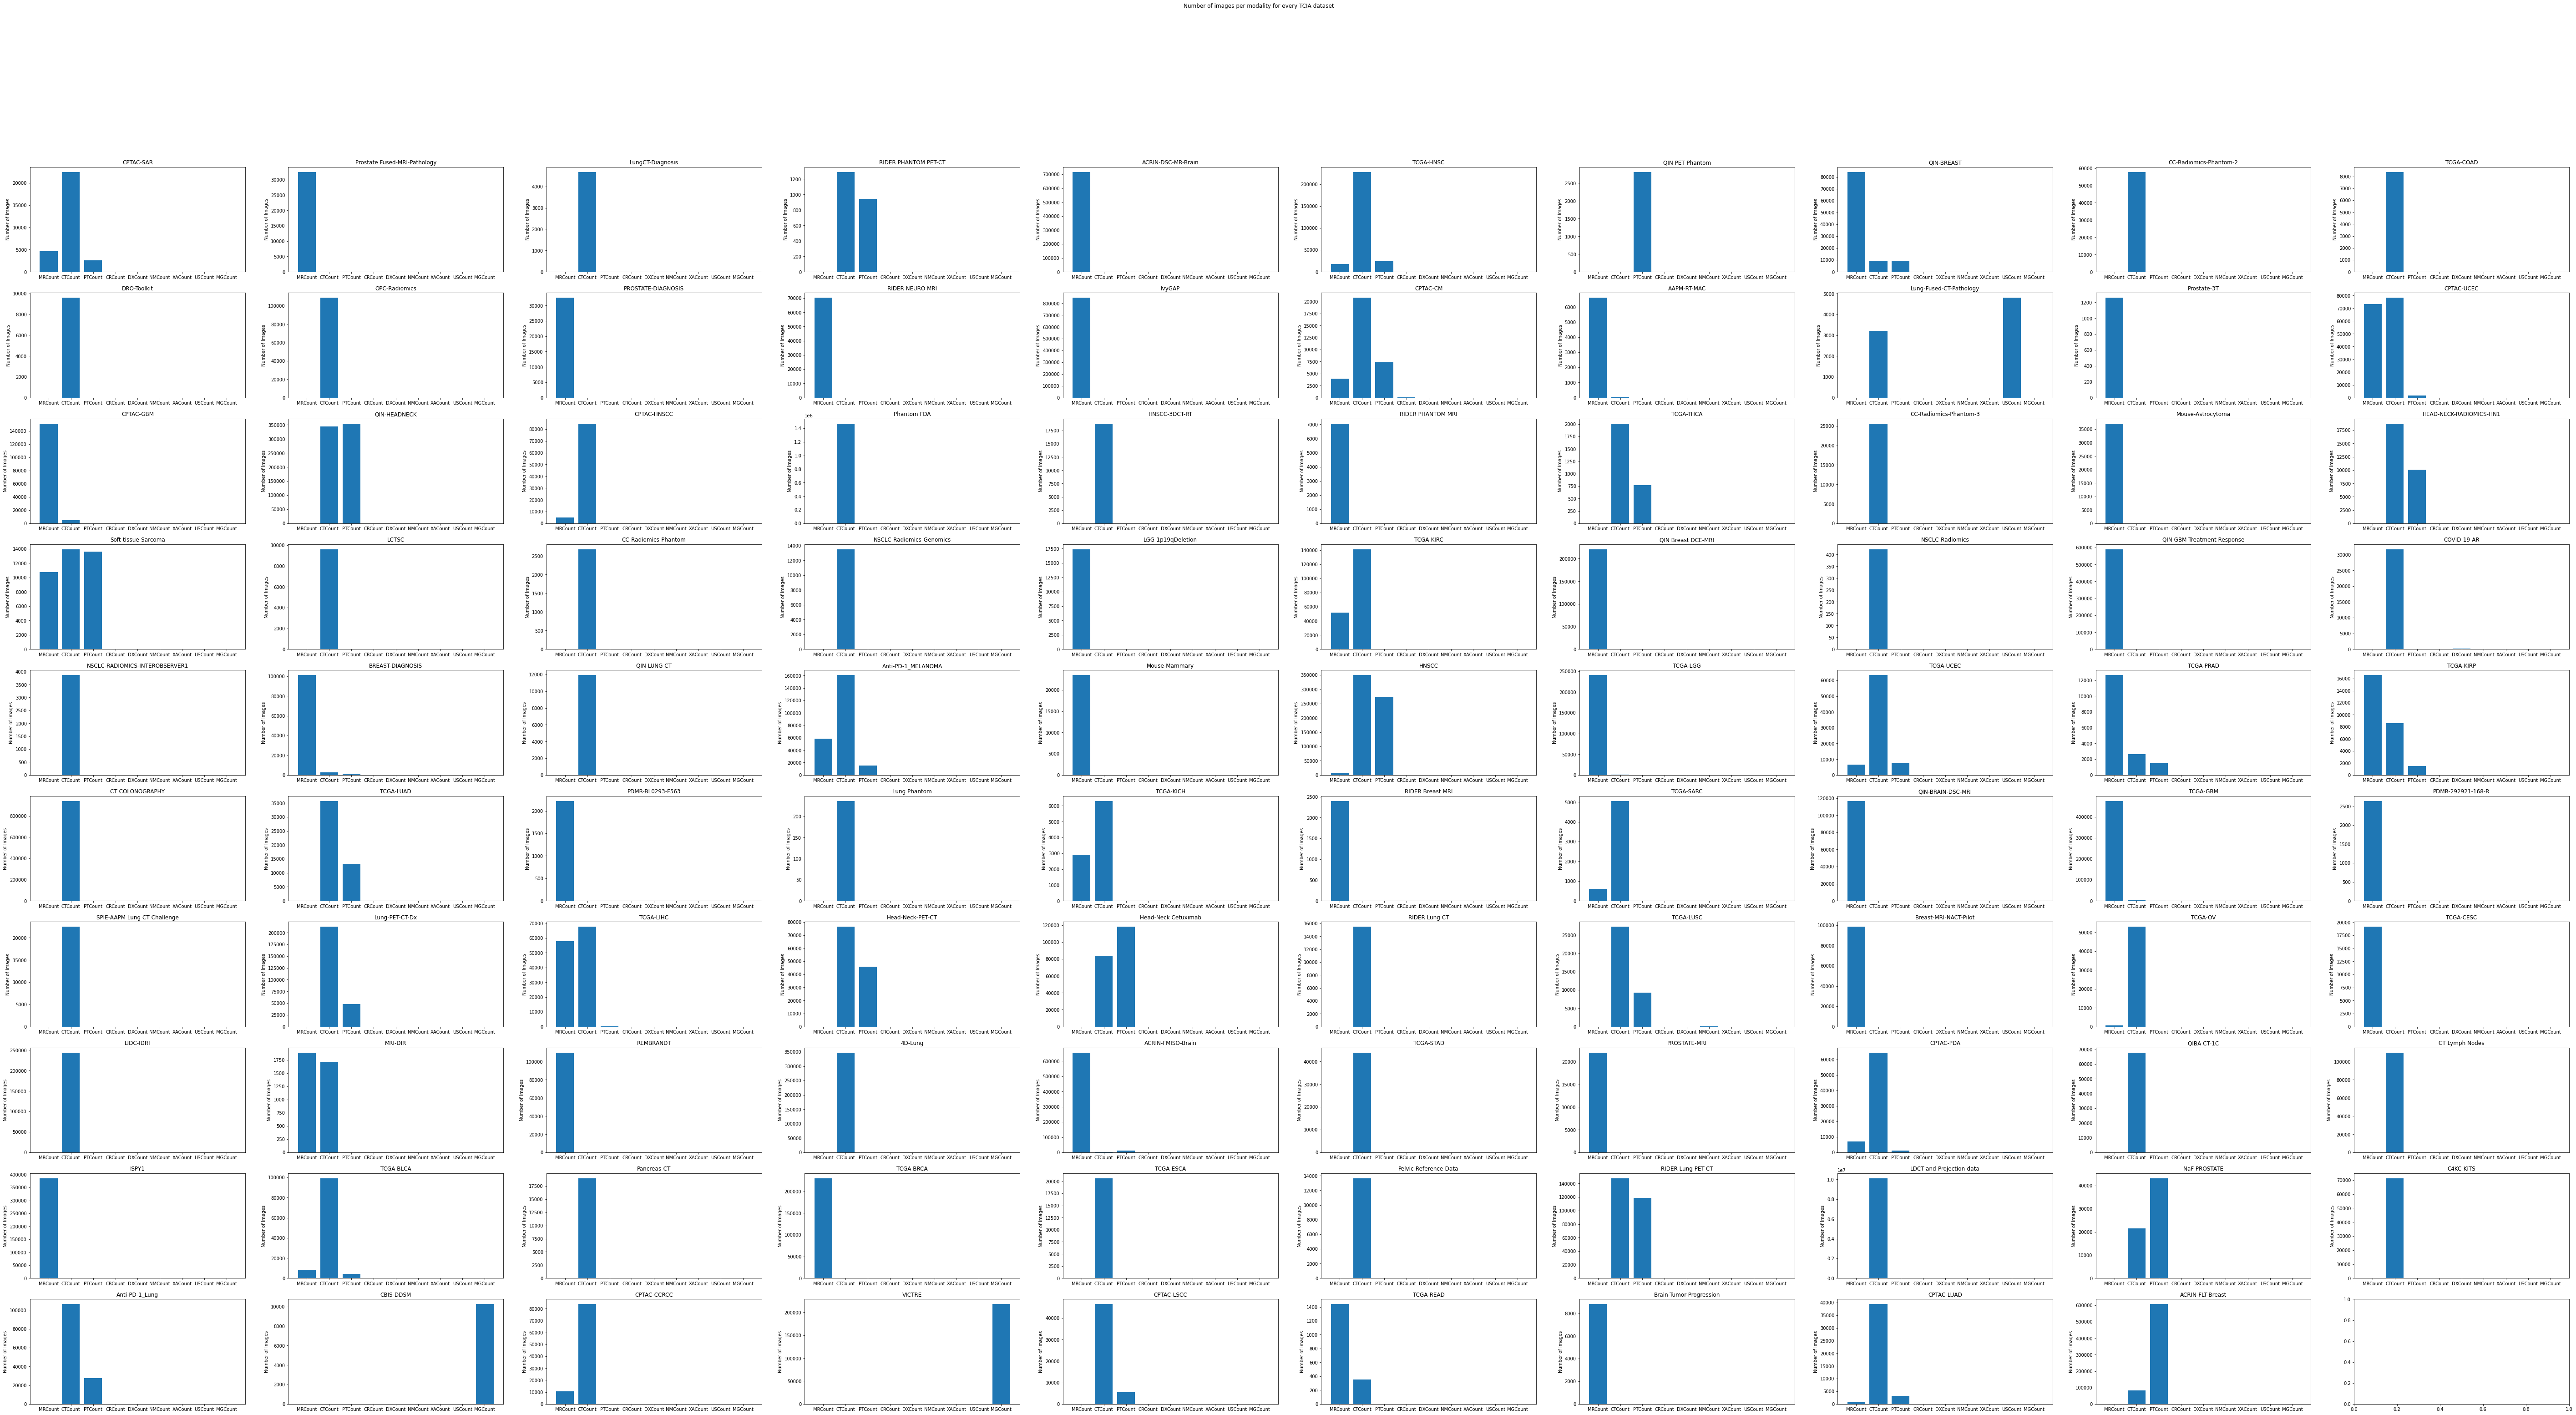

In [8]:
fig, ax = plt.subplots(10, 10, figsize=(100,50))
fig.set_facecolor("white")
fig.suptitle("Number of images per modality for every TCIA dataset")
row = 0
col = 0
for i in range(0, len(metadata_df)):
    y = [metadata_df[col][i] for col in x]
    ax[i // 10, i - (i // 10)*10].bar(x_pos, y)
    ax[i // 10, i - (i // 10)*10].set_xticks(x_pos)
    ax[i // 10, i - (i // 10)*10].set_xticklabels(x)
    ax[i // 10, i - (i // 10)*10].set_ylabel("Number of Images")
    ax[i // 10, i - (i // 10)*10].set_title(metadata_df["Collection"][i])
plt.savefig("./processed/imgs-per-modality-tcia.png", frameon=True)

In [9]:
# How many images do we have for each location?
body_part_dict = defaultdict(int)
import numpy as np
for csv in os.listdir("."):
    if ".csv" not in csv:
        continue

    data = pd.read_csv(csv)
    for body_part in data["BodyPartExamined"]:
        if str(body_part) == "nan":
            pass
        else:
            key = body_part.lower()
            body_part_dict[key] += 1
        
body_part_dict

defaultdict(int,
            {'abdomen': 3113,
             'extremity': 621,
             'pelvis': 945,
             'chest': 12874,
             'wholebody': 20,
             'prostate': 1359,
             'lung': 7744,
             'phantom': 200,
             'brain': 19246,
             'head': 776,
             'headneck': 9339,
             'breast': 33250,
             'colon': 3544,
             'head-and-neck': 1216,
             'chest_to_pelvis': 112,
             'chestabdpelvis': 61,
             'chestabdomen': 13,
             'ct chest wo ce': 9,
             'th ct chest wo ': 11,
             'bd ct abd wo_w ': 2,
             'fusion': 18,
             'seg': 12,
             'abdomenpelvis': 14,
             'carotid': 15,
             'sella': 10,
             'undefined': 3,
             'thorax_1head_ne': 7,
             'neck': 284,
             'head-neck': 8,
             'thyroid': 28,
             'skull': 286,
             'headandneck': 137,
            

In [10]:
body_part_dict = defaultdict(int)
for collection_index in range(0, len(metadata_df)):
    collection_name = metadata_df["Collection"][collection_index]
    collection_data = pd.read_csv(f"{collection_name}.csv")
    for series_index in range(0, len(collection_data)):

        modality = collection_data["Modality"][series_index]
        if modality in modalities:
            body_part = collection_data["BodyPartExamined"][series_index]
            if str(body_part) == "nan":
                pass
            else:
                key = body_part.lower()
                body_part_dict[key] += 1
        else:
            pass
            # print(f"{modality} not in modalities")
body_part_dict = {key: value for key, value in body_part_dict.items() if value > 20}
body_part_dict

{'abdomen': 2907,
 'extremity': 315,
 'pelvis': 945,
 'chest': 5635,
 'prostate': 1359,
 'lung': 6754,
 'phantom': 166,
 'brain': 17783,
 'head': 776,
 'headneck': 6790,
 'breast': 29924,
 'colon': 3543,
 'head-and-neck': 606,
 'chest_to_pelvis': 112,
 'chestabdpelvis': 60,
 'neck': 284,
 'thyroid': 28,
 'skull': 286,
 'kidney': 3054,
 'bladder': 838,
 'uterus': 836,
 'liver': 1711,
 'ovary': 843,
 'cervix': 488,
 'stomach': 308,
 'pancreas': 317,
 'mediastinum': 90,
 'esophagus': 126,
 'rectum': 34}

In [11]:
"""
It turns out that the body part examined field is much less structured than I originally thought. This means I will have to manually move datasets around between train, validate and test until it feels like there is a good spread of locations for each modality. This will be more important for test and validate because they have fewer datasets. 
"""

'\nIt turns out that the body part examined field is much less structured than I originally thought. This means I will have to manually move datasets around between train, validate and test until it feels like there is a good spread of locations for each modality. This will be more important for test and validate because they have fewer datasets. \n'

In [12]:
metadata_df

,Collection,CollectionSize(B),MRCount,CTCount,PTCount,CRCount,DXCount,NMCount,XACount,USCount,MGCount
0,CPTAC-SAR,15196915718,4621,22450,2524,0,0,0,0,0,0
1,Prostate Fused-MRI-Pathology,4743508634,32508,0,0,0,0,0,0,0,0
2,LungCT-Diagnosis,2469159104,0,4682,0,0,0,0,0,0,0
3,RIDER PHANTOM PET-CT,722874316,0,1291,940,0,0,0,0,0,0
4,ACRIN-DSC-MR-Brain,86886455912,717000,70,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
94,CPTAC-LSCC,30943989804,0,46459,5560,22,4,27,0,0,0
95,TCGA-READ,423483788,1440,356,0,0,0,0,0,0,0
96,Brain-Tumor-Progression,3160483188,8798,0,0,0,0,0,0,0,0
97,CPTAC-LUAD,28919406240,758,39383,3192,50,10,27,0,0,0


['MR', 'CT', 'PT', 'XR']
[1659625.0, 1120226.0, 1088389, 235944]
[350439.0, 339054.0, 134075, 112779]
[456815.0, 421279.0, 435035, 80178]


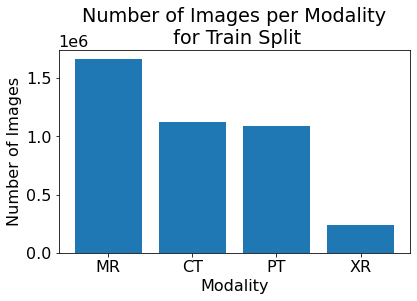

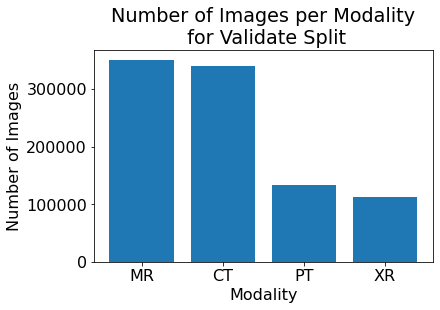

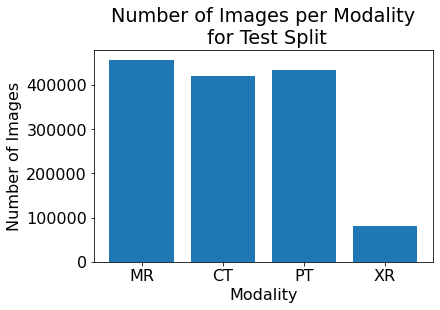

In [13]:
# Creating the train-validate-test split.
def my_sum(to_sum, column):
    total = 0
    max_val = 1e9
    if column == "MRCount":
        max_val = 1e5
    if column == "CTCount":
        max_val = 5e4
    if column == "PTCount":
        max_val = 1e9
    if column == "MGCount":
        max_val = 1e9
    for element in to_sum:
        if element > max_val:
            total += max_val
        else:
            total += element
    return total

train = pd.DataFrame()
validate = pd.DataFrame()
test = pd.DataFrame()

train = metadata_df[0:70]
train = train.drop(47)  #TCGA-UCEC is not PT, dropped. 
train = train.drop(64)  #Head-neck cetuxmab is not PT, dropped.

train = train.drop(21)  # QIN-HEADNECK (CT, PT, head/neck), moved to test

train = train.append(metadata_df.iloc[98])  # ACRIN FLT BREAST (CT, PT, breast)
train = train.append(metadata_df.iloc[91])  # CBIS-DDSM (XR, breast)

validate = metadata_df[70:85]
validate = validate.drop(73) # 4D Lung is not conventional CT, dropped
validate = validate.drop(72)    # REMBRANDT (brain MR), moved to test
validate = validate.drop(77)    # TCGA STAD (CT, abdomen) moved to test
validate = validate.drop(80)    # ISPY1 (breast MR) moved to test

validate = validate.append(metadata_df.iloc[86])    # RIDER Lung PET-CT

test = metadata_df[85:100]
test = test.drop(93) # VICTRE is not X-ray, dropped from dataset

test = test.drop(86) # RIDER Lung PET-CT, moved to valid
test = test.drop(91) # CBIS-DDSM (XR, breast), moved to train
test = test.drop(98) # ACRIN FLT BREAST (CT, PT, breast), moved to train

test = test.append(metadata_df.iloc[72]) # REMBRANDT (brain MR)
test = test.append(metadata_df.iloc[77]) # TCGA STAD (CT, abdomen)
test = test.append(metadata_df.iloc[80]) # ISPY1 (breast MR)
test = test.append(metadata_df.iloc[21]) # QIN-HEADNECK (CT, PT, head/neck)

"""
Other datasets we have are:
Brats:      228160  MRI - TEST
CheXpert:   223414  XR  - TRAIN
MRNEt:      118109  MRI - VALIDATE
nihcc:      112120  XR  - VALIDATE
boneage:    12811   XR  - TRAIN
MURA:       40005   XR  - TEST
OAI:        ~40000 XR   - TEST
"""

final_modalities = ["MR", "CT", "PT", "XR"]

def concat_xrays(sums):
    new_sums = []
    new_sums.extend(sums[:3])
    new_sums.append(sums[3] + sums[4] + sums[5])
    return new_sums
x_pos = [i for i, _ in enumerate(final_modalities)]
x = [col for col in metadata_df if "Count" in col]
train_sum = concat_xrays([my_sum(train[column], column) for column in x])
validate_sum = concat_xrays([my_sum(validate[column], column) for column in x])
test_sum = concat_xrays([my_sum(test[column], column) for column in x])

# adding new datatsets:
train_sum[3] += 223414
train_sum[3] += 12211

validate_sum[3] += 112120
validate_sum[0] += 118109

test_sum[3] += 40005
test_sum[3] += 40000
test_sum[0] += 228160

plt.rcParams.update({"font.size":16})
x = final_modalities
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor("white")

ax.bar(x_pos, train_sum)
ax.set_xticks(x_pos)
fig.tight_layout(pad=6)

ax.set_xticklabels(x)
ax.set_xlabel("Modality")
ax.set_title("Number of Images per Modality\n for Train Split")
ax.set_ylabel("Number of Images")
plt.savefig("./processed/train-split.png")

fig, ax = plt.subplots(figsize=(8, 6))
fig.tight_layout(pad=6)
fig.set_facecolor("white")

ax.bar(x_pos, validate_sum)
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.set_title("Number of Images per Modality\n for Validate Split")
ax.set_ylabel("Number of Images")
ax.set_xlabel("Modality")

plt.savefig("./processed/validate-split.png")

fig, ax = plt.subplots(figsize=(8, 6))
fig.tight_layout(pad=6)
fig.set_facecolor("white")

ax.bar(x_pos, test_sum)
ax.set_xticks(x_pos)
ax.set_xticklabels(x)
ax.set_title("Number of Images per Modality\n for Test Split")
ax.set_ylabel("Number of Images")
ax.set_xlabel("Modality")

print(x)
print(train_sum)
print(validate_sum)
print(test_sum)
plt.savefig("./processed/test-split.png", frameon=True)

In [14]:
train

,Collection,CollectionSize(B),MRCount,CTCount,PTCount,CRCount,DXCount,NMCount,XACount,USCount,MGCount
0,CPTAC-SAR,15196915718,4621,22450,2524,0,0,0,0,0,0
1,Prostate Fused-MRI-Pathology,4743508634,32508,0,0,0,0,0,0,0,0
2,LungCT-Diagnosis,2469159104,0,4682,0,0,0,0,0,0,0
3,RIDER PHANTOM PET-CT,722874316,0,1291,940,0,0,0,0,0,0
4,ACRIN-DSC-MR-Brain,86886455912,717000,70,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
67,Breast-MRI-NACT-Pilot,18136014104,98558,0,0,0,0,0,0,0,0
68,TCGA-OV,28291432412,723,52918,0,0,0,0,0,0,0
69,TCGA-CESC,9500120724,19135,0,0,0,0,0,0,0,0
98,ACRIN-FLT-Breast,74002048012,0,81380,606889,0,0,0,0,0,0


In [15]:
validate

,Collection,CollectionSize(B),MRCount,CTCount,PTCount,CRCount,DXCount,NMCount,XACount,USCount,MGCount
70,LIDC-IDRI,133146249040,0,243958,0,56,513,0,0,0,0
71,MRI-DIR,1435949028,1891,1705,0,0,0,0,0,0,0
74,ACRIN-FMISO-Brain,96107613356,655680,3906,11242,0,0,0,0,0,0
75,TCGA-STAD,23316625360,0,43908,0,0,0,0,0,0,0
76,PROSTATE-MRI,3404944422,22036,0,0,0,0,0,0,0,0
78,QIBA CT-1C,36462746042,0,67872,0,0,0,0,0,0,0
79,CT Lymph Nodes,57794974010,0,110003,0,0,0,0,0,0,0
81,TCGA-BLCA,58033971254,8403,99103,4185,16,74,0,0,0,0
82,Pancreas-CT,9954192018,0,18942,0,0,0,0,0,0,0
83,TCGA-BRCA,88128767720,230134,0,0,0,0,0,0,0,33


In [16]:
test

,Collection,CollectionSize(B),MRCount,CTCount,PTCount,CRCount,DXCount,NMCount,XACount,USCount,MGCount
85,Pelvic-Reference-Data,7187569884,0,13644,0,0,0,0,0,0,0
87,LDCT-and-Projection-data,1022152951368,0,10112591,0,0,0,0,0,0,0
88,NaF PROSTATE,13254285564,0,21437,43098,0,0,0,0,0,0
89,C4KC-KiTS,37681877338,0,71213,0,0,0,0,0,0,0
90,Anti-PD-1_Lung,60936273636,0,106306,27728,0,0,0,0,0,0
92,CPTAC-CCRCC,54693439466,10699,83791,0,5,2,0,0,0,0
94,CPTAC-LSCC,30943989804,0,46459,5560,22,4,27,0,0,0
95,TCGA-READ,423483788,1440,356,0,0,0,0,0,0,0
96,Brain-Tumor-Progression,3160483188,8798,0,0,0,0,0,0,0,0
97,CPTAC-LUAD,28919406240,758,39383,3192,50,10,27,0,0,0


In [17]:
train = train.reset_index(drop = True)
validate = validate.reset_index(drop = True)
test = test.reset_index(drop=True)

In [18]:
from collections import defaultdict

train_dict = defaultdict(int)
def get_bodypart_spread(df):
    bodypart_dict = {modality : defaultdict(int) for modality in modalities}
    print(df)
    for i in range(len(df)):
        print(i)
        bodypart = df["BodyPartExamined"][i]
        for column in df:
            if "Count" not in column:
                continue
            if df[column][i] > 0:
                bodypart_dict[column[:2]][bodypart] += 1
    return bodypart_dict

train_bp, validate_bp, test_bp = [get_bodypart_spread(df) for df in [train, validate, test]]
train_bp["DX"]["Multiple"] += 1
train_bp["DX"]["Chest"] += 1

validate_bp["MR"]["Multiple"] += 1
validate_bp["DX"]["Chest"] += 1

test_bp["MR"]["Brain"] += 1
test_bp["DX"]["Multiple"] += 2


                      Collection  CollectionSize(B)  MRCount  CTCount  \
0                      CPTAC-SAR        15196915718     4621    22450   
1   Prostate Fused-MRI-Pathology         4743508634    32508        0   
2               LungCT-Diagnosis         2469159104        0     4682   
3           RIDER PHANTOM PET-CT          722874316        0     1291   
4             ACRIN-DSC-MR-Brain        86886455912   717000       70   
..                           ...                ...      ...      ...   
64         Breast-MRI-NACT-Pilot        18136014104    98558        0   
65                       TCGA-OV        28291432412      723    52918   
66                     TCGA-CESC         9500120724    19135        0   
67              ACRIN-FLT-Breast        74002048012        0    81380   
68                     CBIS-DDSM       163513027974        0        0   

    PTCount  CRCount  DXCount  NMCount  XACount  USCount  MGCount  
0      2524        0        0        0        0        

KeyError: 'BodyPartExamined'

In [20]:
for key in train_bp:
    print(key)
    for key2 in train_bp[key]:
        print(f"\t{key2} {train_bp[key][key2]}")

MR
	Multiple 4
	Prostate 4
	Brain 9
	Head 4
	Breast 5
	Womb 1
	Phantom 1
	Mouse 2
	Extremities 1
	Kidney 3
	Bladder 1
	Pancreas 1
	Liver 1
	Ovary 1
	Cervix 1
CT
	Multiple 4
	Lung 12
	Phantom 6
	Brain 4
	Head 8
	Breast 3
	Colon 2
	nan 1
	Throat 1
	Womb 1
	Extremities 1
	Kidney 3
	Chest 1
	Prostate 1
	Liver 1
	Ovary 1
PT
	Multiple 3
	Phantom 2
	Head 5
	Breast 3
	Womb 1
	Extremities 1
	Prostate 1
	Kidney 1
	Lung 3
	Liver 1
CR
	Multiple 1
	Womb 1
	Brain 1
	Kidney 1
	Chest 1
DX
	Womb 1
	Chest 2
	Brain 1
	Multiple 1
MG
	Breast 2


In [21]:
for key in validate_bp:
    print(key)
    for key2 in validate_bp[key]:
        print(f"\t{key2} {validate_bp[key][key2]}")

MR
	Phantom 1
	Brain 1
	Prostate 1
	Bladder 1
	Breast 1
	Multiple 1
CT
	Lung 2
	Phantom 2
	Brain 1
	Stomach 1
	nan 1
	Bladder 1
	Pancreas 1
	Throat 1
PT
	Brain 1
	Bladder 1
	Lung 1
CR
	Lung 1
	Bladder 1
DX
	Lung 1
	Bladder 1
	Chest 1
MG
	Breast 1


In [22]:
for key in test_bp:
    print(key)
    for key2 in test_bp[key]:
        print(f"\t{key2} {test_bp[key][key2]}")

MR
	Kidney 2
	Brain 3
	Lung 1
	Pancreas 1
	Breast 1
CT
	Pelvis 1
	Lung 4
	Prostate 1
	Kidney 3
	Pancreas 1
	Head 1
PT
	Prostate 1
	Lung 3
	Pancreas 1
	Head 1
CR
	Kidney 1
	Lung 2
	Pancreas 1
DX
	Kidney 1
	Lung 2
	Pancreas 1
	Multiple 2
MG


In [37]:
train.to_csv("./processed/train.csv", index=False)
validate.to_csv("./processed/validate.csv", index=False)
test.to_csv("./processed/test.csv", index=False)

In [38]:
# Total size of TCIA train: 1TB
# Total size of TCIA validate: 260GB
# Total size of TCIA test: 270GB